In [ ]:
from model import pred_wrap
import torch
import torch.utils.data as data
from pytorch_lightning.callbacks import ModelCheckpoint # checkpoint
from pytorch_lightning.callbacks import StochasticWeightAveraging
from customDataset import customDataset
from torch.utils.data import DataLoader
import pytorch_lightning as pl

batchsize = 100
train_dataset = customDataset("../database/validateset")
# 分割
train_set_size = int(len(train_dataset) * 0.9)
valid_set_size = len(train_dataset) - train_set_size
# split the train set into two
seed = torch.Generator().manual_seed(42)
train_set, valid_set = data.random_split(train_dataset, [train_set_size, valid_set_size], generator=seed)
train_loader = DataLoader(dataset=train_set, batch_size=batchsize, shuffle=True, num_workers=44,\
                          drop_last=False, prefetch_factor=40, pin_memory=True, persistent_workers=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=batchsize, num_workers=44,\
                          drop_last=False, prefetch_factor=40, pin_memory=True, persistent_workers=True)
Model = pred_wrap(
                 edgefea=35,
                 nodefea=36,
                 dropout=0.5,
                 head=3,
                 alpha=0.3,
                 layer=18,
                 poolwidth=21,
                 weight_decay=1e-4,
                 lr_rate=1e-2
                 )
checkpoint_callbacks = ModelCheckpoint(
    save_top_k=10,
    monitor="valid_mcc",
    mode="max",
    filename="aegan-{epoch:02d}-{mcc:.4f}"
)
trainer = pl.Trainer(
    devices=2,
    accelerator="gpu",
    default_root_dir='./result_logs/', 
    max_epochs=1000,
    callbacks=[checkpoint_callbacks, StochasticWeightAveraging(swa_lrs=1e-2)],
#     accumulate_grad_batches=10, # 开启累计梯度
#     precision=16,
#     strategy="ddp_notebook"
#     val_check_interval=0.25
)
trainer.fit(model=Model, 
            train_dataloaders=train_loader, 
            val_dataloaders=valid_loader,
            ckpt_path="./trained_result_logs/lightning_logs/version_1/checkpoints/aegan-epoch=304-valid_mcc=0.8192.ckpt"
           )
# trainer.test(model=Model, train_dataloaders=train_loader, val_dataloaders=valid_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/2
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 2 processes
----------------------------------------------------------------------------------------------------

Restoring states from the checkpoint path at ./trained_result_logs/lightning_logs/version_1/checkpoints/aegan-epoch=304-valid_mcc=0.8192.ckpt
/home/biorefinery/SXW/download/Anconda/envs/pytorch/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:345: UserWarning: The dirpath has changed from 'train_result_logs/lightning_logs/version_1/checkpoints' to 'result_logs/lightning_logs/version_9/checkpoints', therefore `best_mod

Sanity Checking: 0it [00:00, ?it/s]

Training: 315it [00:00, ?it/s]

[W reducer.cpp:1303] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused parameters. (function operator())
[W reducer.cpp:1303] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later 

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
from ad_model import pred_wrap
import torch
import torch.utils.data as data
from pytorch_lightning.callbacks import ModelCheckpoint # checkpoint
from pytorch_lightning.callbacks import StochasticWeightAveraging
from customDataset import customDataset
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from collections import defaultdict
import os
from pandas import DataFrame

excel_data = defaultdict(list)

batchsize = 100
validate_dataset = customDataset("../database/validateset")
validate_loader = DataLoader(dataset=validate_dataset, batch_size=batchsize, num_workers=40,\
                          drop_last=False, prefetch_factor=10, pin_memory=True, persistent_workers=True)
basedir = "./trained_result_logs/lightning_logs"
path = os.listdir("./trained_result_logs/lightning_logs")
path.remove(".ipynb_checkpoints")
for item in path:
    ckpoints = os.listdir(os.path.join(basedir, item, "checkpoints"))
#     ckpoints.remove(".ipynb_checkpoints")
    for itemy in ckpoints:
        Model = pred_wrap.load_from_checkpoint(os.path.join(basedir, item, "checkpoints", itemy))
        trainer = pl.Trainer(
                devices=1,
                accelerator="gpu",
        )
        x = trainer.test(model=Model, dataloaders=validate_loader)[0]
        excel_data["path"].append(os.path.join(basedir, item, "checkpoints", itemy))
        for k in x.keys():
            excel_data[k].append(x[k])
df = DataFrame(excel_data)
df.to_excel('result.xlsx')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.914185106754303
     test_f_measure         0.7936739921569824
        test_loss           0.15333862602710724
        test_mcc            0.7434357404708862
     test_precision         0.7623719573020935
       test_recall           0.836235523223877
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9139289259910583
     test_f_measure         0.7922078371047974
        test_loss           0.15225490927696228
        test_mcc            0.7414216995239258
     test_precision         0.7631917595863342
       test_recall          0.8314186930656433
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9222542643547058
     test_f_measure         0.8119486570358276
        test_loss           0.14870107173919678
        test_mcc            0.7661257982254028
     test_precision         0.7848460674285889
       test_recall          0.8485404253005981
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9123278856277466
     test_f_measure          0.784551739692688
        test_loss           0.16290555894374847
        test_mcc            0.7319241762161255
     test_precision         0.7661638259887695
       test_recall          0.8105127215385437
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9193723797798157
     test_f_measure         0.8053449988365173
        test_loss           0.1697508692741394
        test_mcc             0.757716953754425
     test_precision         0.7786712050437927
       test_recall          0.8414756059646606
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9079090356826782
     test_f_measure         0.7849684953689575
        test_loss           0.1508958786725998
        test_mcc            0.7318742275238037
     test_precision         0.7366356253623962
       test_recall          0.8482088446617126
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9121997952461243
     test_f_measure         0.7925148010253906
        test_loss           0.15311235189437866
        test_mcc            0.7418183088302612
     test_precision         0.7538110017776489
       test_recall          0.8449203968048096
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.912071704864502
     test_f_measure         0.7928922772407532
        test_loss           0.16866493225097656
        test_mcc            0.7423257231712341
     test_precision         0.7498448491096497
       test_recall          0.8501564264297485
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9041306376457214
     test_f_measure         0.7816542387008667
        test_loss           0.14937931299209595
        test_mcc            0.7285659909248352
     test_precision         0.7171586751937866
       test_recall          0.8675633072853088
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9128402471542358
     test_f_measure         0.8089011907577515
        test_loss           0.1539851874113083
        test_mcc            0.7652817964553833
     test_precision         0.7214329242706299
       test_recall          0.9279960989952087
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8340697884559631
     test_f_measure         0.4184098541736603
        test_loss           0.32427382469177246
        test_mcc            0.38566991686820984
     test_precision         0.7089388370513916
       test_recall          0.30468323826789856
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8379762768745422
     test_f_measure         0.4875743091106415
        test_loss           0.2875328063964844
        test_mcc            0.4239341616630554
     test_precision         0.6718570590019226
       test_recall          0.3904159963130951
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9235350489616394
     test_f_measure         0.8288472294807434
        test_loss            0.108405202627182
        test_mcc             0.788991391658783
     test_precision         0.7536780834197998
       test_recall          0.9277076125144958
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9266090393066406
     test_f_measure         0.8291313648223877
        test_loss           0.1296171247959137
        test_mcc            0.7874624729156494
     test_precision         0.7773529291152954
       test_recall          0.8946529030799866
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9207813143730164
     test_f_measure         0.8190770745277405
        test_loss           0.1300780028104782
        test_mcc            0.7758926749229431
     test_precision         0.7572144269943237
       test_recall          0.9005435705184937
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9222542643547058
     test_f_measure         0.8119486570358276
        test_loss           0.14870107173919678
        test_mcc            0.7661257982254028
     test_precision         0.7848460674285889
       test_recall          0.8485404253005981
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9177073240280151
     test_f_measure         0.8138245344161987
        test_loss           0.12418094277381897
        test_mcc             0.770000159740448
     test_precision         0.7455093860626221
       test_recall          0.9051116108894348
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9286583662033081
     test_f_measure         0.8343282341957092
        test_loss           0.11738508194684982
        test_mcc            0.7942805886268616
     test_precision         0.7808793187141418
       test_recall          0.9023516178131104
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.910086452960968
     test_f_measure         0.8031994700431824
        test_loss           0.14769358932971954
        test_mcc            0.7585946917533875
     test_precision          0.715076744556427
       test_recall          0.9246394634246826
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9222542643547058
     test_f_measure         0.8185371160507202
        test_loss           0.12318898737430573
        test_mcc            0.7737018465995789
     test_precision         0.7732035517692566
       test_recall          0.8766388893127441
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9135446548461914
     test_f_measure         0.8093346357345581
        test_loss           0.10605978220701218
        test_mcc            0.7657813429832458
     test_precision         0.7243322730064392
       test_recall          0.9248613715171814
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9223182797431946
     test_f_measure         0.8189281225204468
        test_loss           0.14952707290649414
        test_mcc            0.7752672433853149
     test_precision         0.7675074338912964
       test_recall          0.8858144283294678
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8760166764259338
     test_f_measure         0.7281303405761719
        test_loss           0.16750556230545044
        test_mcc            0.6607073545455933
     test_precision         0.6504480242729187
       test_recall          0.8375278115272522
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8814601302146912
     test_f_measure         0.7354257106781006
        test_loss           0.17871813476085663
        test_mcc            0.6690045595169067
     test_precision         0.6672519445419312
       test_recall          0.8288713097572327
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8717899322509766
     test_f_measure         0.7175424098968506
        test_loss            0.170162171125412
        test_mcc            0.6473534107208252
     test_precision         0.6420153379440308
       test_recall          0.8243246078491211
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8749920129776001
     test_f_measure         0.7223948240280151
        test_loss           0.18152651190757751
        test_mcc            0.6536954641342163
     test_precision         0.6512224674224854
       test_recall          0.8232254385948181
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8735190629959106
     test_f_measure         0.7257471084594727
        test_loss           0.16669657826423645
        test_mcc            0.6588637232780457
     test_precision         0.6414874792098999
       test_recall          0.8468933701515198
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8725584149360657
     test_f_measure         0.7251994013786316
        test_loss           0.16680465638637543
        test_mcc            0.6583378911018372
     test_precision         0.6382166743278503
       test_recall          0.8507464528083801
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8731347918510437
     test_f_measure         0.7251870036125183
        test_loss           0.1664283573627472
        test_mcc            0.6582416892051697
     test_precision          0.640596330165863
       test_recall          0.8470960855484009
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8762727975845337
     test_f_measure         0.7376990914344788
        test_loss           0.18425264954566956
        test_mcc            0.6753514409065247
     test_precision         0.6431155800819397
       test_recall          0.8762596845626831
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8746718168258667
     test_f_measure          0.72632896900177
        test_loss           0.1696474552154541
        test_mcc            0.6593295335769653
     test_precision         0.6452191472053528
       test_recall          0.8420968651771545
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8748639225959778
     test_f_measure         0.7263226509094238
        test_loss           0.17458294332027435
        test_mcc            0.6586960554122925
     test_precision         0.6465668082237244
       test_recall          0.8390172719955444
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9193723797798157
     test_f_measure         0.7661125659942627
        test_loss            0.198638454079628
        test_mcc            0.7330160140991211
     test_precision          0.900992751121521
       test_recall          0.6746663451194763
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9259045720100403
     test_f_measure         0.7940413355827332
        test_loss            0.195613294839859
        test_mcc            0.7582961320877075
     test_precision          0.889813244342804
       test_recall          0.7244908213615417
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.916938841342926
     test_f_measure         0.7596782445907593
        test_loss           0.2122049182653427
        test_mcc            0.7252295613288879
     test_precision         0.8946402072906494
       test_recall          0.6686735153198242
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9165545701980591
     test_f_measure         0.7951922416687012
        test_loss           0.17445071041584015
        test_mcc            0.7455986142158508
     test_precision         0.7842109203338623
       test_recall          0.8149290680885315
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8761447072029114
     test_f_measure         0.5701692700386047
        test_loss           0.24332816898822784
        test_mcc             0.568023681640625
     test_precision         0.9231295585632324
       test_recall          0.42047181725502014
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8080050945281982
     test_f_measure         0.10606452822685242
        test_loss           0.3119042217731476
        test_mcc            0.17371736466884613
     test_precision         0.7016757130622864
       test_recall          0.05854310467839241
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8008965849876404
     test_f_measure        0.038169365376234055
        test_loss           0.29884642362594604
        test_mcc            0.0758432000875473
     test_precision         0.3650336265563965
       test_recall         0.020248781889677048
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8257444500923157
     test_f_measure         0.26072707772254944
        test_loss           0.29488030076026917
        test_mcc            0.32076945900917053
     test_precision          0.875562310218811
       test_recall          0.15792828798294067
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8016650676727295
     test_f_measure         0.04588202387094498
        test_loss           0.30883368849754333
        test_mcc            0.08342166990041733
     test_precision         0.3778418302536011
       test_recall         0.024750469252467155
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8144732713699341
     test_f_measure         0.16266018152236938
        test_loss           0.2947785258293152
        test_mcc            0.2322719395160675
     test_precision         0.7943217158317566
       test_recall          0.09365919232368469
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9108549356460571
     test_f_measure         0.8054417371749878
        test_loss           0.12415957450866699
        test_mcc            0.7616776823997498
     test_precision         0.7150058746337891
       test_recall          0.9302444458007812
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9099583625793457
     test_f_measure         0.7991217374801636
        test_loss           0.12594369053840637
        test_mcc            0.7520321607589722
     test_precision         0.7213548421859741
       test_recall          0.9043116569519043
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9295549392700195
     test_f_measure         0.8384465575218201
        test_loss           0.17311695218086243
        test_mcc            0.7999553084373474
     test_precision          0.778036892414093
       test_recall          0.9160287976264954
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9114953279495239
     test_f_measure          0.800198495388031
        test_loss           0.12693475186824799
        test_mcc            0.7524829506874084
     test_precision         0.7312555313110352
       test_recall          0.8924894332885742
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9059237837791443
     test_f_measure         0.7917002439498901
        test_loss           0.1279343217611313
        test_mcc            0.7423405647277832
     test_precision         0.7123233675956726
       test_recall          0.8993924856185913
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9209094047546387
     test_f_measure          0.819740891456604
        test_loss           0.10445067286491394
        test_mcc            0.7772077918052673
     test_precision         0.7534998059272766
       test_recall          0.9068495631217957
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9205891489982605
     test_f_measure         0.8131124377250671
        test_loss           0.1442844569683075
        test_mcc            0.7677441239356995
     test_precision         0.7680951356887817
       test_recall          0.8719356060028076
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9158501625061035
     test_f_measure         0.8127867579460144
        test_loss           0.12171614170074463
        test_mcc            0.7690814733505249
     test_precision         0.7358136773109436
       test_recall          0.9162838459014893
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9143772125244141
     test_f_measure         0.8073739409446716
        test_loss           0.1300162822008133
        test_mcc            0.7613576054573059
     test_precision         0.7367958426475525
       test_recall          0.9010094404220581
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9177073240280151
     test_f_measure         0.8069562911987305
        test_loss           0.15826241672039032
        test_mcc            0.7592971324920654
     test_precision         0.7619884610176086
       test_recall          0.8647959232330322
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


ModuleNotFoundError: No module named 'openpyxl'

In [12]:
# from add_model import pred_wrap
from model import pred_wrap
import torch
import torch.utils.data as data
from pytorch_lightning.callbacks import ModelCheckpoint # checkpoint
from pytorch_lightning.callbacks import StochasticWeightAveraging
from customDataset import customDataset
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from collections import defaultdict
import os
from pandas import DataFrame

In [1]:
recall_data = defaultdict(list)
precision_data = defaultdict(list)
f1_data = defaultdict(list)
mcc_data = defaultdict(list)
accuracy_data = defaultdict(list)
batchsize = 100
BaseCheckPath = "./train_result_logs/lightning_logs/version_32/checkpoints/"
SetPathList = [
               "../database/validateset",
               "../database/BenchmarkDataset_Processed/PC", 
               "../database/BenchmarkDataset_Processed/NN", 
               "../database/BenchmarkDataset_Processed/EF_family",
               "../database/BenchmarkDataset_Processed/EF_fold",
               "../database/BenchmarkDataset_Processed/EF_superfamily",
               "../database/BenchmarkDataset_Processed/HA_superfamily"
              ]
trainer = pl.Trainer(
        devices=1,
        accelerator="gpu",
)
# trainer.test(model=Model, dataloaders=validate_loader)
for item in os.listdir(BaseCheckPath):
    Model = pred_wrap.load_from_checkpoint(os.path.join(BaseCheckPath, item),loss_fn = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.0, 5.0])))
    for setname in SetPathList:
        validate_dataset = customDataset(setname)
        validate_loader = DataLoader(dataset=validate_dataset, batch_size=batchsize, num_workers=40,\
                          drop_last=False, prefetch_factor=10, persistent_workers=True)
        result = trainer.test(model=Model, dataloaders=validate_loader)[0]
        setname = setname.split('/')[-1]
        recall_data['SetName'].append(setname)
        precision_data['SetName'].append(setname)
        f1_data['SetName'].append(setname)
        mcc_data['SetName'].append(setname)
        accuracy_data['SetName'].append(setname)
        recall_data[f'{item}'].append(result['test_recall'])
        precision_data[f'{item}'].append(result['test_precision'])
        f1_data[f'{item}'].append(result['test_f_measure'])
        mcc_data[f'{item}'].append(result['test_mcc'])
        accuracy_data[f'{item}'].append(result['test_accuracy'])
df = DataFrame(recall_data)
df.to_excel("recall_result.xlsx")
df = DataFrame(precision_data)
df.to_excel("precision_result.xlsx")
df = DataFrame(f1_data)
df.to_excel("f1_result.xlsx")
df = DataFrame(mcc_data)
df.to_excel("mcc_result.xlsx")
df = DataFrame(accuracy_data)
df.to_excel("accuracy_result.xlsx")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9330131411552429
     test_f_measure         0.8487911224365234
        test_loss           0.24144838750362396
        test_mcc            0.8145872354507446
     test_precision         0.7752199769020081
       test_recall          0.9447265863418579
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9664570093154907
     test_f_measure         0.9191428422927856
        test_loss           0.10805496573448181
        test_mcc            0.9033764600753784
     test_precision         0.8718729615211487
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9204188585281372
     test_f_measure          0.819119393825531
        test_loss           0.31462326645851135
        test_mcc            0.7774670720100403
     test_precision         0.7448179125785828
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9471656680107117
     test_f_measure         0.8793307542800903
        test_loss           0.22402559220790863
        test_mcc            0.8510386943817139
     test_precision         0.8337902426719666
       test_recall          0.9390850067138672
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9368029832839966
     test_f_measure          0.857852041721344
        test_loss           0.26862961053848267
        test_mcc            0.8228675127029419
     test_precision         0.7985822558403015
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9423791766166687
     test_f_measure          0.868395209312439
        test_loss           0.20279920101165771
        test_mcc            0.8368793725967407
     test_precision          0.812567412853241
       test_recall          0.9385839700698853
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9319371581077576
     test_f_measure         0.8390757441520691
        test_loss           0.3176608383655548
        test_mcc            0.7997503876686096
     test_precision         0.7967528104782104
       test_recall          0.8913760185241699
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9322446584701538
     test_f_measure          0.847578763961792
        test_loss           0.23714330792427063
        test_mcc            0.8132692575454712
     test_precision         0.7713476419448853
       test_recall           0.947140634059906
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9643605947494507
     test_f_measure         0.9149321913719177
        test_loss           0.10707581788301468
        test_mcc            0.8980117440223694
     test_precision         0.8640009164810181
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9193717241287231
     test_f_measure         0.8171971440315247
        test_loss           0.3144708275794983
        test_mcc            0.7751887440681458
     test_precision         0.7417570948600769
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9444138407707214
     test_f_measure         0.8730465173721313
        test_loss           0.2237013727426529
        test_mcc            0.8431051969528198
     test_precision         0.8247509002685547
       test_recall          0.9359526634216309
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9355638027191162
     test_f_measure         0.8555254936218262
        test_loss           0.2668091654777527
        test_mcc            0.8199716210365295
     test_precision         0.7945224046707153
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9423791766166687
     test_f_measure          0.86905437707901
        test_loss           0.20044969022274017
        test_mcc            0.8376948833465576
     test_precision         0.8105989694595337
       test_recall          0.9423014521598816
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9289454221725464
     test_f_measure         0.8325009942054749
        test_loss           0.31582868099212646
        test_mcc            0.7915720343589783
     test_precision         0.7881147861480713
       test_recall          0.8876363039016724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9328209757804871
     test_f_measure          0.848364531993866
        test_loss           0.23888574540615082
        test_mcc            0.8139984011650085
     test_precision         0.7738738656044006
       test_recall          0.9450936913490295
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9643605947494507
     test_f_measure         0.9149321913719177
        test_loss           0.10452250391244888
        test_mcc            0.8980117440223694
     test_precision         0.8640009164810181
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9204188585281372
     test_f_measure         0.8190698623657227
        test_loss           0.3140328526496887
        test_mcc            0.7769842743873596
     test_precision         0.7437639832496643
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9455145597457886
     test_f_measure         0.8749846816062927
        test_loss           0.22482550144195557
        test_mcc             0.845523476600647
     test_precision         0.8299620747566223
       test_recall           0.933987021446228
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9368029832839966
     test_f_measure          0.857852041721344
        test_loss           0.26565736532211304
        test_mcc            0.8228675127029419
     test_precision         0.7985822558403015
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9442379474639893
     test_f_measure         0.8736600875854492
        test_loss           0.19927874207496643
        test_mcc            0.8427927494049072
     test_precision         0.8216879963874817
       test_recall          0.9385839700698853
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9319371581077576
     test_f_measure         0.8385379314422607
        test_loss           0.3146286606788635
        test_mcc            0.7991307973861694
     test_precision         0.7991119027137756
       test_recall          0.8876363039016724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9327569603919983
     test_f_measure         0.8489981889724731
        test_loss           0.23915913701057434
        test_mcc            0.8149221539497375
     test_precision         0.7729286551475525
       test_recall           0.948267936706543
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9643605947494507
     test_f_measure         0.9149321913719177
        test_loss           0.10790904611349106
        test_mcc            0.8980117440223694
     test_precision         0.8640009164810181
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9193717241287231
     test_f_measure         0.8174440264701843
        test_loss           0.3157058656215668
        test_mcc            0.7754743099212646
     test_precision         0.7423375844955444
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9433131814002991
     test_f_measure         0.8709672689437866
        test_loss           0.2270641326904297
        test_mcc            0.8404330015182495
     test_precision         0.8229100108146667
       test_recall           0.933987021446228
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9355638027191162
     test_f_measure         0.8555254936218262
        test_loss           0.2715267241001129
        test_mcc            0.8199716210365295
     test_precision         0.7945224046707153
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9414498209953308
     test_f_measure         0.8668298125267029
        test_loss           0.20848417282104492
        test_mcc             0.835045576095581
     test_precision         0.8102316856384277
       test_recall          0.9385839700698853
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9304412603378296
     test_f_measure         0.8370339274406433
        test_loss           0.31882190704345703
        test_mcc            0.7970241904258728
     test_precision         0.7922700047492981
       test_recall           0.892622709274292
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9323726892471313
     test_f_measure         0.8475683927536011
        test_loss           0.23737940192222595
        test_mcc            0.8131768703460693
     test_precision          0.772055983543396
       test_recall          0.9459759593009949
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9643605947494507
     test_f_measure         0.9149321913719177
        test_loss           0.10436783730983734
        test_mcc            0.8980117440223694
     test_precision         0.8640009164810181
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9183245897293091
     test_f_measure         0.8151420950889587
        test_loss           0.3110479414463043
        test_mcc            0.7723643183708191
     test_precision         0.7375153303146362
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9449642300605774
     test_f_measure         0.8740299940109253
        test_loss           0.22246001660823822
        test_mcc            0.8442342281341553
     test_precision         0.8281589150428772
       test_recall           0.933987021446228
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9355638027191162
     test_f_measure         0.8555254936218262
        test_loss           0.26354852318763733
        test_mcc            0.8199716210365295
     test_precision         0.7945224046707153
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9433085322380066
     test_f_measure         0.8714126348495483
        test_loss           0.1980435848236084
        test_mcc            0.8402506709098816
     test_precision          0.817926287651062
       test_recall          0.9385839700698853
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.929693341255188
     test_f_measure         0.8340591788291931
        test_loss           0.31134533882141113
        test_mcc            0.7934390306472778
     test_precision         0.7908034324645996
       test_recall          0.8876363039016724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9323726892471313
     test_f_measure         0.8475683927536011
        test_loss           0.2373783141374588
        test_mcc            0.8131768703460693
     test_precision          0.772055983543396
       test_recall          0.9459759593009949
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9643605947494507
     test_f_measure         0.9149321913719177
        test_loss           0.10436733067035675
        test_mcc            0.8980117440223694
     test_precision         0.8640009164810181
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9183245897293091
     test_f_measure         0.8151420950889587
        test_loss           0.31104612350463867
        test_mcc            0.7723643183708191
     test_precision         0.7375153303146362
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9449642300605774
     test_f_measure         0.8740299940109253
        test_loss           0.2224583476781845
        test_mcc            0.8442342281341553
     test_precision         0.8281589150428772
       test_recall           0.933987021446228
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9355638027191162
     test_f_measure         0.8555254936218262
        test_loss           0.26354748010635376
        test_mcc            0.8199716210365295
     test_precision         0.7945224046707153
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9433085322380066
     test_f_measure         0.8714126348495483
        test_loss           0.19804178178310394
        test_mcc            0.8402506709098816
     test_precision          0.817926287651062
       test_recall          0.9385839700698853
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.929693341255188
     test_f_measure         0.8340591788291931
        test_loss           0.3113424777984619
        test_mcc            0.7934390306472778
     test_precision         0.7908034324645996
       test_recall          0.8876363039016724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9325007796287537
     test_f_measure         0.8488492369651794
        test_loss           0.23144815862178802
        test_mcc            0.8152599930763245
     test_precision         0.7698389887809753
       test_recall          0.9526569247245789
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9601677060127258
     test_f_measure         0.9063156843185425
        test_loss           0.0934678167104721
        test_mcc            0.8872389793395996
     test_precision         0.8481673002243042
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9172775149345398
     test_f_measure         0.8123893141746521
        test_loss           0.2972686290740967
        test_mcc            0.7695356607437134
     test_precision         0.7344134449958801
       test_recall          0.9145241975784302
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9422124624252319
     test_f_measure         0.8685670495033264
        test_loss           0.2120344489812851
        test_mcc            0.8376559615135193
     test_precision          0.818953275680542
       test_recall           0.933987021446228
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9380421042442322
     test_f_measure         0.8585134744644165
        test_loss           0.24886108934879303
        test_mcc            0.8241521120071411
     test_precision         0.7993835806846619
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9442379474639893
     test_f_measure         0.8742188215255737
        test_loss           0.19278720021247864
        test_mcc             0.842734158039093
     test_precision         0.8237495422363281
       test_recall          0.9361057281494141
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.931189239025116
     test_f_measure         0.8390133380889893
        test_loss           0.2993292808532715
        test_mcc            0.7994815707206726
     test_precision         0.7931320667266846
       test_recall          0.8957390785217285
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9325007796287537
     test_f_measure         0.8482524156570435
        test_loss           0.24097897112369537
        test_mcc            0.8141753673553467
     test_precision         0.7718229293823242
       test_recall          0.9482285976409912
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9643605947494507
     test_f_measure         0.9149321913719177
        test_loss           0.10788635164499283
        test_mcc            0.8980117440223694
     test_precision         0.8640009164810181
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9172775149345398
     test_f_measure         0.8133643269538879
        test_loss           0.31733354926109314
        test_mcc            0.7707000970840454
     test_precision         0.7357816696166992
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9444138407707214
     test_f_measure          0.873629629611969
        test_loss           0.2263883650302887
        test_mcc            0.8431707620620728
     test_precision         0.8261870741844177
       test_recall          0.9346821904182434
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9355638027191162
     test_f_measure         0.8555254936218262
        test_loss           0.2674833834171295
        test_mcc            0.8199716210365295
     test_precision         0.7945224046707153
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9423791766166687
     test_f_measure         0.8684449195861816
        test_loss           0.20244495570659637
        test_mcc            0.8364765644073486
     test_precision          0.817111074924469
       test_recall          0.9327754378318787
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9289454221725464
     test_f_measure         0.8328651189804077
        test_loss           0.3178972601890564
        test_mcc            0.7918113470077515
     test_precision         0.7886269092559814
       test_recall          0.8876363039016724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9323086738586426
     test_f_measure         0.8475104570388794
        test_loss           0.2377571165561676
        test_mcc            0.8130411505699158
     test_precision         0.7721869349479675
       test_recall          0.9456389546394348
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9643605947494507
     test_f_measure         0.9149321913719177
        test_loss           0.1048140674829483
        test_mcc            0.8980117440223694
     test_precision         0.8640009164810181
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9172775149345398
     test_f_measure         0.8131497502326965
        test_loss           0.31197917461395264
        test_mcc             0.770042896270752
     test_precision         0.7343739867210388
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9444138407707214
     test_f_measure         0.8731114268302917
        test_loss           0.22289608418941498
        test_mcc            0.8429422378540039
     test_precision         0.8263557553291321
       test_recall           0.933987021446228
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9355638027191162
     test_f_measure         0.8555254936218262
        test_loss           0.26380059123039246
        test_mcc            0.8199716210365295
     test_precision         0.7945224046707153
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9433085322380066
     test_f_measure         0.8714126348495483
        test_loss           0.1987578570842743
        test_mcc            0.8402506709098816
     test_precision          0.817926287651062
       test_recall          0.9385839700698853
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.931189239025116
     test_f_measure         0.8368791937828064
        test_loss           0.31278640031814575
        test_mcc            0.7971134781837463
     test_precision         0.7960870862007141
       test_recall          0.8876363039016724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9317322969436646
     test_f_measure         0.8467230796813965
        test_loss           0.23942610621452332
        test_mcc            0.8122979998588562
     test_precision         0.7691988945007324
       test_recall          0.9481487274169922
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9622641801834106
     test_f_measure         0.9105693697929382
        test_loss           0.10620740056037903
        test_mcc            0.8923690319061279
     test_precision         0.8555048108100891
       test_recall          0.9800339341163635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9162303805351257
     test_f_measure          0.811385989189148
        test_loss           0.31406787037849426
        test_mcc            0.7680715918540955
     test_precision         0.7319238185882568
       test_recall          0.9158331155776978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9444138407707214
     test_f_measure         0.8736584186553955
        test_loss           0.22407205402851105
        test_mcc            0.8435997366905212
     test_precision         0.8248829245567322
       test_recall          0.9368836283683777
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9343246817588806
     test_f_measure         0.8536579608917236
        test_loss           0.2661513388156891
        test_mcc             0.817683219909668
     test_precision         0.7917359471321106
       test_recall          0.9313367605209351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9423791766166687
     test_f_measure         0.8696072101593018
        test_loss           0.20004111528396606
        test_mcc            0.8379800319671631
     test_precision         0.8146734833717346
       test_recall          0.9385839700698853
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.929693341255188
     test_f_measure         0.8340591788291931
        test_loss           0.31338387727737427
        test_mcc            0.7934390306472778
     test_precision         0.7908034324645996
       test_recall          0.8876363039016724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


ValueError: All arrays must be of the same length

In [18]:
# 测试消融实验
from model import pred_wrap
import torch
import torch.utils.data as data
from pytorch_lightning.callbacks import ModelCheckpoint # checkpoint
from pytorch_lightning.callbacks import StochasticWeightAveraging
from customDataset import customDataset
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from collections import defaultdict
from tqdm import tqdm
import os
store_data = defaultdict(list)
trainer = pl.Trainer(
        devices=1,
        accelerator="gpu",
)
setname = 'EAT'
base = "../code/AblationExperiment/version_EAT/checkpoints/"
validate_dataset = customDataset("../database/validateset", Lack='Atchley')
validate_loader = DataLoader(dataset=validate_dataset, batch_size=100, num_workers=40,\
                          drop_last=False, prefetch_factor=10, persistent_workers=True)
for m in tqdm(os.listdir(base)):
    Model = pred_wrap.load_from_checkpoint(os.path.join(base, m),loss_fn = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.0, 5.0])))
    result = trainer.test(model=Model, dataloaders=validate_loader)[0]
    store_data[m] = [ v for k, v in result.items() if k != 'test_loss']
store_data[setname] = [ k for k, v in result.items() if k != 'test_loss']
df = DataFrame(store_data)
df.set_index = setname
df.to_excel(setname+'.xlsx')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
  0%|                                                                                                                                                                                  | 0/10 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9155939817428589
     test_f_measure         0.8162941336631775
        test_loss           0.22236163914203644
        test_mcc            0.7764561176300049
     test_precision         0.7222083806991577
       test_recall          0.9466156959533691
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 10%|█████████████████                                                                                                                                                         | 1/10 [00:30<04:38, 30.91s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9129682779312134
     test_f_measure         0.8132590651512146
        test_loss           0.28900042176246643
        test_mcc            0.7738379836082458
     test_precision          0.713437557220459
       test_recall           0.954629123210907
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 20%|██████████████████████████████████                                                                                                                                        | 2/10 [01:01<04:07, 30.97s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9015690088272095
     test_f_measure         0.7947208881378174
        test_loss           0.27117329835891724
        test_mcc             0.75303715467453
     test_precision         0.6819425821304321
       test_recall          0.9614123106002808
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 30%|███████████████████████████████████████████████████                                                                                                                       | 3/10 [01:33<03:37, 31.10s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8966378569602966
     test_f_measure         0.7862935662269592
        test_loss           0.31171536445617676
        test_mcc            0.7439430356025696
     test_precision         0.6689725518226624
       test_recall          0.9634340405464172
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 40%|████████████████████████████████████████████████████████████████████                                                                                                      | 4/10 [02:04<03:06, 31.16s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8987511992454529
     test_f_measure         0.7922605276107788
        test_loss           0.2683483958244324
        test_mcc            0.7522616386413574
     test_precision         0.6714158654212952
       test_recall          0.9750573635101318
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 5/10 [02:36<02:37, 31.41s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8849183320999146
     test_f_measure          0.77081298828125
        test_loss           0.2941287159919739
        test_mcc            0.7280154228210449
     test_precision         0.6418027281761169
       test_recall          0.9761521220207214
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 6/10 [03:07<02:05, 31.38s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8945885300636292
     test_f_measure          0.783520519733429
        test_loss           0.24525238573551178
        test_mcc            0.7401713728904724
     test_precision         0.6658410429954529
       test_recall          0.9617399573326111
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 7/10 [03:38<01:34, 31.35s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9024015665054321
     test_f_measure          0.796746015548706
        test_loss           0.30056872963905334
        test_mcc            0.7558125257492065
     test_precision         0.6827287673950195
       test_recall          0.9650483131408691
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 8/10 [04:10<01:02, 31.32s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9046429991722107
     test_f_measure         0.8005251884460449
        test_loss           0.25485894083976746
        test_mcc            0.7601445317268372
     test_precision         0.6888025403022766
       test_recall          0.9644262790679932
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 9/10 [04:41<00:31, 31.25s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9121997952461243
     test_f_measure         0.8140482902526855
        test_loss           0.21721376478672028
        test_mcc            0.7768756151199341
     test_precision         0.7064079642295837
       test_recall          0.9697239995002747
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:12<00:00, 31.26s/it]


In [27]:
# 工具
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc, roc_curve
import torch.nn.functional as F
# 画PR曲线
from model import predictor
import torch
import torch.utils.data as data
from pytorch_lightning.callbacks import ModelCheckpoint # checkpoint
from pytorch_lightning.callbacks import StochasticWeightAveraging
from customDataset import customDataset
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from collections import defaultdict
import os
from pandas import DataFrame
from tqdm import tqdm

def pr_curve(yp, yl, method_name):
    for y_pred, y_label, n in zip(yp, yl, method_name):
        y_label = np.array(y_label)
        y_pred = np.array(y_pred)    
        lr_precision, lr_recall, _ = precision_recall_curve(y_label, y_pred)    
    #   plt.plot([0,1], [no_skill, no_skill], linestyle='--')
        plt.plot(lr_recall, lr_precision, lw = 2, label= n + ' (area = %0.4f)' % average_precision_score(y_label, y_pred))
    fontsize = 14
    plt.xlabel('Sensitive', fontsize = fontsize)
    plt.ylabel('Precision', fontsize = fontsize)
    plt.legend(loc="lower left")
def auc_curve(yp, yl, method_name):
    for y_pred, y_label, n in zip(yp, yl, method_name):
        y_label = np.array(y_label)
        y_pred = np.array(y_pred)    
        fpr = dict()
        tpr = dict() 
        roc_auc = dict()
        fpr[0], tpr[0], _ = roc_curve(y_label, y_pred)
        roc_auc[0] = auc(fpr[0], tpr[0])
        lw = 2
        plt.plot(fpr[0], tpr[0],lw=lw, label= n + ' (area = %0.4f)' % roc_auc[0])
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
#     plt.xticks(font="Times New Roman",size=18,weight="bold")
#     plt.yticks(font="Times New Roman",size=18,weight="bold")
    fontsize = 14
    plt.xlabel('False Positive Rate', fontsize = fontsize)
    plt.ylabel('True Positive Rate', fontsize = fontsize)
    #plt.title('Receiver Operating Characteristic Curve', fontsize = fontsize)
    plt.legend(loc="lower right")
#     plt.savefig('roc' + ".pdf")
#     return 

In [1]:
def load_model(path):
    model = predictor(
                     edgefea=35,
                     nodefea=36,
                     dropout=0.5,
                     head=3,
                     alpha=0.3,
                     layer=24)
    trained_model = torch.load(path)
    param = {}
    trained_param = trained_model['state_dict']
    for k in model.state_dict().keys():
        param[k] = trained_param[f'predictor.{k}']
    model.load_state_dict(param)
    return model

def validate(MyModel, TestDataloder):
    pre = []
    label = []
    MyModel.eval()
    with torch.no_grad():
        for data in tqdm(TestDataloder):
            node, edge, adj, target = data  # 获取数据
            # 把数据送入GPU并计算
            node = node.cuda()
            edge = edge.cuda()
            adj = adj.cuda()
            out_put = MyModel(node, edge, adj)
            # 统计结果
            out_put = F.softmax(out_put, dim=-1)[:, 1:].squeeze()
            pre.extend(out_put.cpu().tolist())
            label.extend(target.tolist())
    return pre, label
def get_pre_data(model_path):
    SetPathList = [
                   "../database/validateset",
                   "../database/BenchmarkDataset_Processed/PC", 
                   "../database/BenchmarkDataset_Processed/NN", 
                   "../database/BenchmarkDataset_Processed/EF_family",
                   "../database/BenchmarkDataset_Processed/EF_fold",
                   "../database/BenchmarkDataset_Processed/EF_superfamily",
                   "../database/BenchmarkDataset_Processed/HA_superfamily"
                  ]
    pre = []
    label = []
    name = []
    Model = load_model(model_path)
    for setname in SetPathList:
        validate_dataset = customDataset(setname)
        validate_loader = DataLoader(dataset=validate_dataset, batch_size=100, num_workers=40,\
                          drop_last=False, prefetch_factor=10, persistent_workers=True)
        p, t = validate(Model.cuda(), validate_loader)
        pre.append(p)
        label.append(t)
        name.append(setname.split('/')[-1])
    return pre, label, name

In [14]:
pre, label, name = get_pre_data("./train_result_logs/lightning_logs/version_1/checkpoints/aegan-epoch=453-valid_mcc=0.8269-valid_f_measure=0.8587-valid_recall=0.9731.ckpt")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.09it/s]


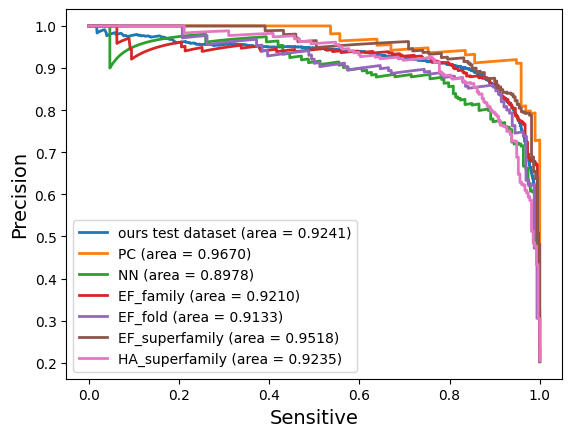

In [28]:
import numpy as np
name[0] = 'ours test dataset'
pr_curve(pre, label, name)
plt.savefig("PR.png", dpi=600)

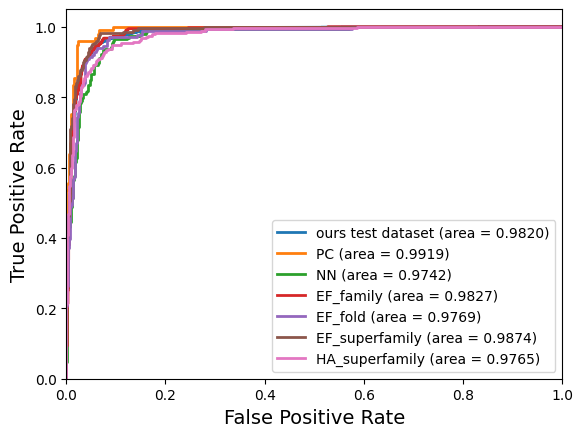

In [29]:
name[0] = 'ours test dataset'
auc_curve(pre, label, name)
plt.savefig("auc.png", dpi=600)

[0.3138866126537323,
 2.4849754254319123e-08,
 6.293460863560085e-09,
 0.010761967860162258,
 5.1633524122962626e-08,
 0.9980389475822449,
 4.25372945755953e-06,
 0.00012681924272328615,
 9.314353519584984e-05,
 0.0002138249546987936,
 0.9999629259109497,
 0.9996345043182373,
 0.28270435333251953,
 4.446304501470877e-06,
 0.00014706318324897438,
 2.1635727875946031e-07,
 8.204713594750501e-06,
 9.148937533609569e-05,
 0.06953851878643036,
 0.00013957377814222127,
 0.9957838654518127,
 0.00012972891272511333,
 0.7826128602027893,
 2.5385297703905962e-05,
 0.9318002462387085,
 1.2279664929337741e-07,
 0.205941304564476,
 0.9995957016944885,
 2.895191357765725e-07,
 0.0001525527477497235,
 2.935848669949337e-06,
 0.9979960918426514,
 0.9824554920196533,
 0.0028238906525075436,
 5.882348546037974e-07,
 2.445122160299462e-10,
 0.9582143425941467,
 0.02119847945868969,
 0.00047096668276935816,
 0.00971180573105812,
 0.9999831914901733,
 2.7051290089730173e-05,
 2.119887176377233e-05,
 0.0067